In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.utilities.dataframe_functions import impute

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [11]:
filename = 'C:\Users\LC121\PycharmProjects\data';
f = open(filename)
df_rows = []
for line in f.readlines():
    values = map(float,line.split(' '))
    df_rows.append( values)
df = pd.DataFrame(df_rows, columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz','time','pid','ftime','class','id'])  #'id', 'time'

In [12]:
df.head()

,ax,ay,az,gx,gy,gz,time,pid,ftime,class,id
0,1.713430,-9.549328,-5.983863,0.558718,-5.537163,-1.516521,1.0,4.0,2.017063e+13,3.0,1.0
1,1.713430,-9.549328,-5.983863,0.558718,-5.537163,-1.516521,2.0,4.0,2.017063e+13,3.0,1.0
2,1.713430,-9.549328,-5.983863,0.558718,-5.537163,-1.516521,3.0,4.0,2.017063e+13,3.0,1.0
3,8.732043,-3.651495,-10.694004,-0.638535,0.439525,-1.315382,4.0,4.0,2.017063e+13,3.0,1.0
4,8.732043,-3.651495,-10.694004,-0.638535,0.439525,-1.315382,5.0,4.0,2.017063e+13,3.0,1.0


(76800, 8)

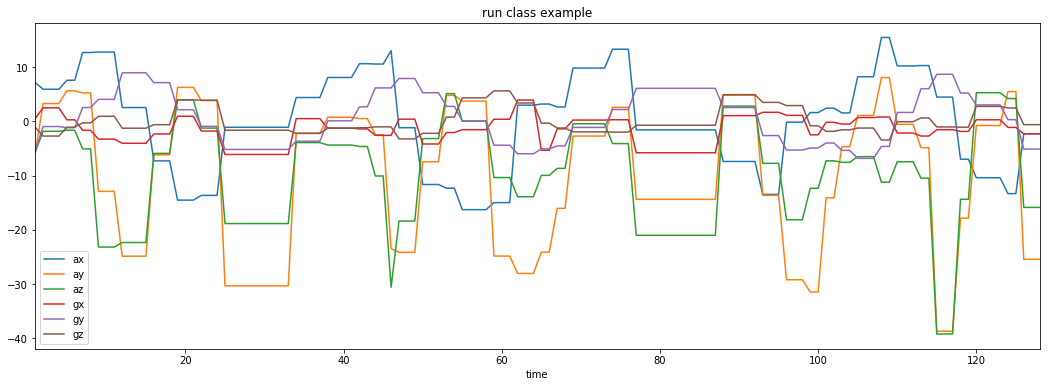

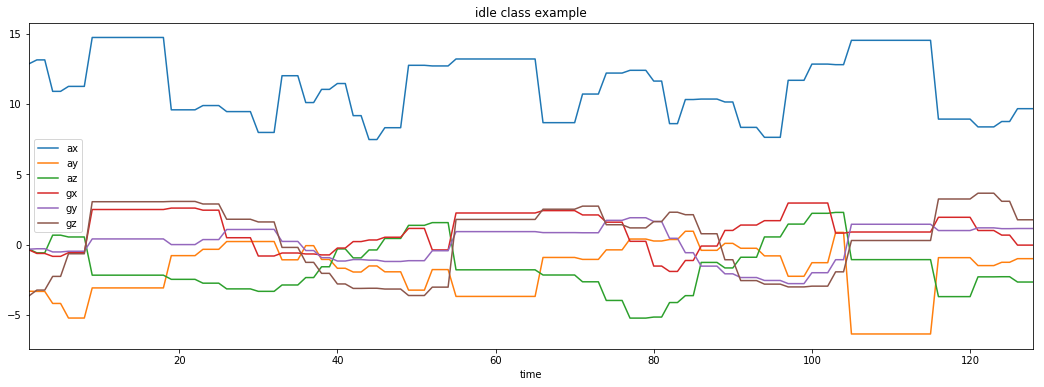

In [13]:
df[df.id == 20][['time','ax', 'ay', 'az', 'gx', 'gy', 'gz']].plot(x='time',title = 'run class example',figsize=(18,6));
df[df.id == 501][['time','ax', 'ay', 'az', 'gx', 'gy', 'gz']].plot(x='time',title = 'idle class example',figsize=(18,6));
df[['time','ax', 'ay', 'az', 'gx', 'gy', 'gz','id']].shape

In [14]:
data = df[df.id == [1]][['time','ax', 'ay', 'az', 'gx', 'gy', 'gz','id','class']];

In [15]:
extraction_settings = ComprehensiveFCParameters()
extraction_settings.IMPUTE = impute 

In [16]:
data = df[['time','ax', 'ay', 'az', 'gx', 'gy', 'gz','id']];
X = extract_features(data, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                    impute_function= impute)

Feature Extraction: 100%|████████████████████████| 6/6 [08:48<00:00, 84.73s/it]


In [37]:
y1 = {};
for i in range(0, y.shape[0], 128):
    y1[(i+1)//128+1] = int(y.at[i,'class'])
y1 = pd.Series(y1)

y1

1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
      ..
571    1
572    1
573    1
574    1
575    1
576    1
577    1
578    1
579    1
580    1
581    1
582    1
583    1
584    1
585    1
586    1
587    1
588    1
589    1
590    1
591    1
592    1
593    1
594    1
595    1
596    1
597    1
598    1
599    1
600    1
dtype: int64

In [35]:
X.head()

,gz__range_count__max_1__min_-1,gz__large_standard_deviation__r_0.05,gz__mean_autocorrelation,gz__sum_of_reoccurring_values,gz__standard_deviation,gz__sum_values,gz__value_count__value_nan,gz__large_standard_deviation__r_0.35,gz__absolute_sum_of_changes,gz__mean_abs_change,...,az__fft_coefficient__coeff_0,az__fft_coefficient__coeff_1,az__fft_coefficient__coeff_2,az__fft_coefficient__coeff_3,az__fft_coefficient__coeff_4,az__fft_coefficient__coeff_5,az__fft_coefficient__coeff_6,az__fft_coefficient__coeff_7,az__fft_coefficient__coeff_8,az__fft_coefficient__coeff_9
id,,,,,,,,,,,,,,,,,,,,,
1.0,22.0,1.0,1.491856,30.888067,3.081886,81.688853,0.0,0.0,67.941200,0.534970,...,-176.057967,82.991585,-18.759617,0.129046,13.422498,-13.683251,-13.217550,-2.276638,-8.427681,-12.008351
2.0,30.0,1.0,1.432053,-46.327850,5.956734,-71.458465,0.0,0.0,168.421076,1.326150,...,-417.369663,-128.700306,61.980452,71.100190,29.419474,4.861402,53.253751,37.350099,40.727783,17.378055
3.0,45.0,1.0,1.351713,18.816564,4.372597,49.502437,0.0,0.0,111.452043,0.877575,...,-106.696292,32.287795,-5.137190,0.645224,1.843678,8.483822,-4.334956,1.526456,-5.567577,2.810314
4.0,42.0,1.0,1.150858,9.235348,4.022698,36.441203,0.0,0.0,123.508648,0.972509,...,-16.104336,-32.607604,-15.739290,-11.199430,-4.911735,5.258167,-0.471971,-3.141022,-6.355217,-13.834098
5.0,27.0,1.0,1.244303,-20.889675,5.412911,-169.396975,0.0,0.0,167.450502,1.318508,...,-155.783566,19.419865,-23.549075,-8.657962,15.632850,7.780674,6.547838,24.266900,25.717263,18.283760


In [38]:
# 分开进行
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

#extracted_features = extract_features(data, 
#                     column_id='id', column_sort='time',
 #                    default_fc_parameters=extraction_settings)
    
extracted_features = X;

impute(extracted_features)
features_filtered = select_features(extracted_features,y1);

In [61]:
features_filtered.columns

Index([              u'gz__mean_abs_change_quantiles__qh_1.0__ql_0.0',
                                       u'gz__absolute_sum_of_changes',
                                               u'gz__mean_abs_change',
                     u'gy__mean_abs_change_quantiles__qh_0.8__ql_0.2',
                     u'gz__mean_abs_change_quantiles__qh_1.0__ql_0.2',
                     u'gz__mean_abs_change_quantiles__qh_0.8__ql_0.0',
                     u'gy__mean_abs_change_quantiles__qh_0.8__ql_0.0',
                     u'gy__mean_abs_change_quantiles__qh_1.0__ql_0.2',
                     u'ax__mean_abs_change_quantiles__qh_1.0__ql_0.0',
                                               u'ax__mean_abs_change',
       ...
        u'ay__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_5',
                                        u'ax__autocorrelation__lag_2',
       u'gx__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20',
                                    u'gx__index_mass_quantile__q_0

In [24]:
X_filtered = extract_relevant_features(data, y1, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|████████████████████████| 6/6 [08:46<00:00, 84.81s/it]


TypeError: The type of target vector y must be one of: pandas.Series, numpy.ndarray

In [44]:
X_train, X_test,Xe_train, Xe_test, y_train, y_test = train_test_split(X,extracted_features, y1, test_size=.4)
y_train.shape

(360,)

In [21]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_train, cl.predict(X_train)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        90
          1       1.00      1.00      1.00        93
          2       1.00      1.00      1.00        76
          3       1.00      1.00      1.00       101

avg / total       1.00      1.00      1.00       360



In [48]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94        60
          1       0.91      0.95      0.93        65
          2       1.00      0.95      0.97        56
          3       1.00      0.98      0.99        59

avg / total       0.96      0.96      0.96       240



In [47]:
cl = DecisionTreeClassifier()
cl.fit(Xe_train, y_train)
print(classification_report(y_test, cl.predict(Xe_test)))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        60
          1       0.91      0.95      0.93        65
          2       1.00      0.96      0.98        56
          3       1.00      0.98      0.99        59

avg / total       0.96      0.96      0.96       240



In [63]:
relevant_features = set()

for label in y1.unique():
    y_train_binary = y_train == label
    X_train_filtered = select_features(X_train, y_train_binary)
    print("Number of relevant features for class {}: {}/{}".format(label, X_train_filtered.shape[1], X_train.shape[1]))
    relevant_features = relevant_features.union(set(X_train_filtered.columns))

Number of relevant features for class 3: 580/1650
Number of relevant features for class 1: 263/1650
Number of relevant features for class 0: 600/1650
Number of relevant features for class 2: 283/1650


In [65]:
print len(relevant_features)
print relevant_features

673


set(['gz__number_cwt_peaks__n_1', 'az__large_standard_deviation__r_0.3', 'ay__maximum', 'gx__mean_abs_change_quantiles__qh_0.8__ql_0.2', 'gx__mean_abs_change_quantiles__qh_0.8__ql_0.0', 'gx__binned_entropy__max_bins_10', 'gx__mean_abs_change_quantiles__qh_0.8__ql_0.6', 'gx__mean_abs_change_quantiles__qh_0.8__ql_0.4', 'gz__mean_autocorrelation', 'gy__index_mass_quantile__q_0.9', 'gy__index_mass_quantile__q_0.8', 'gy__index_mass_quantile__q_0.7', 'gz__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"intercept"', 'gy__autocorrelation__lag_8', 'gy__value_count__value_0', 'az__maximum', 'gz__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"', 'gy__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"', 'gz__mean_abs_change_quantiles__qh_0.6__ql_0.0', 'gy__variance_larger_than_standard_deviation', 'gx__standard_deviation', 'ay__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"', 'gy__mean_abs_change', 'az__approximate_entropy__m_2__r_0.9', 'az__approximate_entro